In [1]:
import numpy as np
import pandas as pd
import pylab as P
import matplotlib.pyplot as plt
import csv as csv

In [2]:
# Pandas DataFrame
df_train = pd.read_csv('../Data Files/train.csv')
df_test = pd.read_csv('../Data Files/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check dataframe info: some missed values in "Age", and lots of missed values in "Cabin"
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
# Turn "Sex" column categories to numbers
from sklearn.preprocessing import LabelEncoder

Sex_le = LabelEncoder()
df_train['Sex'] = Sex_le.fit_transform(df_train['Sex'])
df_test['Sex'] = Sex_le.fit_transform(df_test['Sex'])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Turn "Embarked" column categories to dummy features (one-hot encoding)

# df_train = pd.concat([df_train, pd.get_dummies(df_train[['Embarked']])], axis=1)
# df_test = pd.concat([df_test, pd.get_dummies(df_test[['Embarked']])], axis=1)
# df_train.head()

In [6]:
# Fill missing value of Age in both train and test dataset
median_ages = np.zeros((2, 3))

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i, j] = df_train[(df_train['Sex'] == i) &
                                     (df_train['Pclass'] == j + 1)]['Age'].dropna().median()

df_train['AgeFill'] = df_train['Age']
df_test['AgeFill'] = df_test['Age']


for i in range(0, 2):
    for j in range(0, 3):
        df_train.loc[(df_train.Age.isnull()) & (df_train.Sex == i) & (
            df_train.Pclass == j + 1), 'AgeFill'] = median_ages[i, j]
        df_test.loc[(df_test.Age.isnull()) & (df_test.Sex == i) & (
            df_test.Pclass == j + 1), 'AgeFill'] = median_ages[i, j]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeFill        891 non-null float64
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 73.1+ KB


In [7]:
# Fill missing value of Fare in test dataset
df_test.Fare[df_test.Fare.isnull()] = df_train.Fare.median()

d:\python35-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
# Create "Age*Class" column
df_train['Age*Class'] = df_train.AgeFill * df_train.Pclass
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass

# Create "Family size" column
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,Age*Class,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,66.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,78.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,35.0,105.0,0


In [9]:
# Collect the test data's PassengerIds before dropping it
test_ids = df_test['PassengerId'].values

In [10]:
# Drop object data
df_train = df_train.drop(
    ['Name', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Age', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name', 'Parch', 'Ticket', 'Cabin',
                        'Embarked', 'Age', 'PassengerId'], axis=1)
df_train.head()

,Survived,Pclass,Sex,SibSp,Fare,AgeFill,Age*Class,FamilySize
0,0,3,1,1,7.2500,22.0,66.0,1
1,1,1,0,1,71.2833,38.0,38.0,1
2,1,3,0,0,7.9250,26.0,78.0,0
3,1,1,0,1,53.1000,35.0,35.0,1
4,0,3,1,0,8.0500,35.0,105.0,0


In [11]:
# From given train dataset split train and test
from sklearn.cross_validation import train_test_split

X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.30, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1, C=10))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.780


d:\python35-32\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [13]:
# Use the whole train data to predict

# test_data = df_test.values
# pipe_lr.fit(X, y)
# test_pred = pipe_lr.predict(test_data)

In [14]:
# k-fold cross-validation
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.76190476  0.76190476  0.79365079  0.82539683  0.87301587  0.88888889
  0.79032258  0.83606557  0.81967213  0.81967213]
CV accuracy: 0.817 +/- 0.040


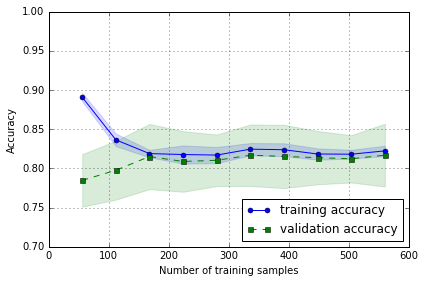

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

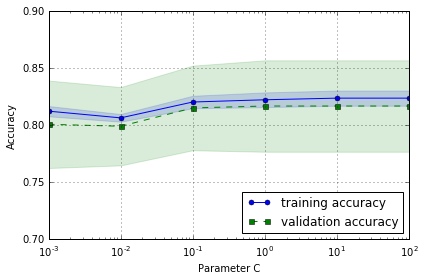

In [16]:
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

In [17]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.837881219904
{'clf__gamma': 0.1, 'clf__kernel': 'rbf', 'clf__C': 10.0}


In [18]:
clf = gs.best_estimator_
clf.fit(X, y)

test_data = df_test.values
test_pred  = clf.predict(test_data)

predictions_file = open("../submissions/LRModel-20160609-1.csv", 'w', newline='')
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId", "Survived"])
open_file_object.writerows(zip(test_ids, test_pred))
predictions_file.close()